#  STC TV – Time Series Forecasting
Forecast total watch time for the next 60 days and visualize trends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
# Load daily watch‑time dataset
file_path = 'stc TV Data Set_T2.xlsx' 
df = pd.read_excel(file_path)
df['date_'] = pd.to_datetime(df['date_'])
df = df.set_index('date_').sort_index()
df = df.resample('D').sum()
df.head()

,Unnamed: 0,Total_watch_time_in_houres
date_,,
2018-01-01,0,1123.551944
2018-01-02,1,1000.129722
2018-01-03,2,881.924444
2018-01-04,3,782.669444
2018-01-05,4,1051.939444


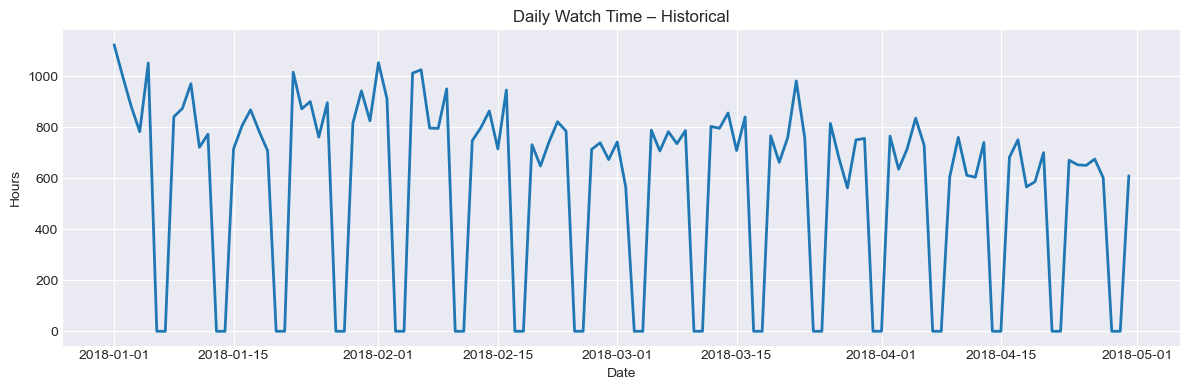

In [4]:
# Plot historical watch time
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Total_watch_time_in_houres'], linewidth=2)
plt.title('Daily Watch Time – Historical')
plt.ylabel('Hours')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig('historical_watch_time.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# Simple linear trend model
df['t'] = np.arange(len(df))
X = df[['t']]
y = df['Total_watch_time_in_houres']
model = LinearRegression().fit(X, y)

# Forecast next 60 days
future_steps = 60
future_t = np.arange(len(df), len(df)+future_steps).reshape(-1,1)
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=future_steps)
future_pred = model.predict(future_t)
forecast_df = pd.DataFrame({'Predicted_watch_time': future_pred}, index=future_dates)

# Combine
combined = pd.concat([df[['Total_watch_time_in_houres']], forecast_df], axis=0)
combined.tail()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Total_watch_time_in_houres,Predicted_watch_time
2018-06-25,NaN,327.837759
2018-06-26,NaN,325.831280
2018-06-27,NaN,323.824800
2018-06-28,NaN,321.818320
2018-06-29,NaN,319.811840


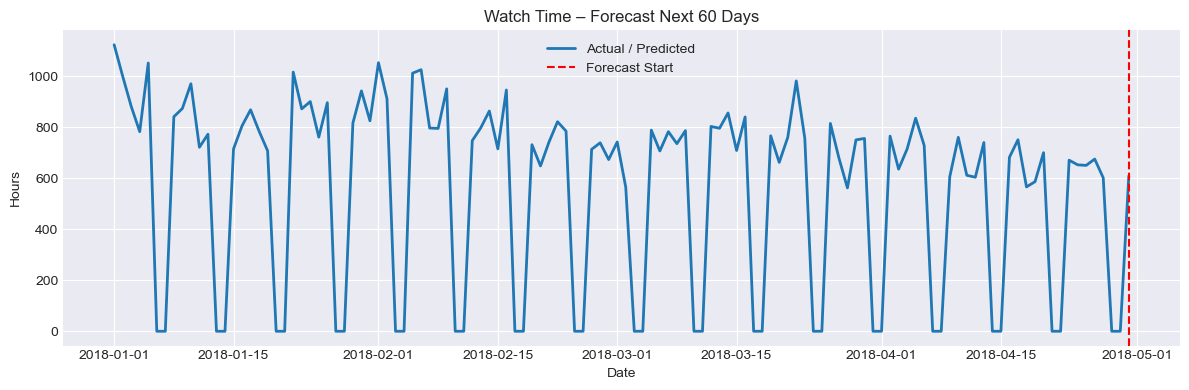

In [6]:
# Plot forecast vs historical
plt.figure(figsize=(12,4))
plt.plot(combined.index, combined.iloc[:,0], label='Actual / Predicted', linewidth=2)
plt.axvline(df.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('Watch Time – Forecast Next 60 Days')
plt.ylabel('Hours')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.savefig('watch_time_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Show peak forecast day
peak_day = forecast_df['Predicted_watch_time'].idxmax().date()
peak_value = forecast_df['Predicted_watch_time'].max()
print(f'Peak predicted day: {peak_day} with {peak_value:.1f} hours')

Peak predicted day: 2018-05-01 with 438.2 hours
